In [1]:
import os
import cv2
import numpy as np
from network import *
from keras.models import load_model
from matplotlib import pyplot as plt

# Load image

In [2]:
img_load = os.path.join('dog_cat_cls_data', 'raw', 'cat.1.jpg')
print(img_load)

dog_cat_cls_data/raw/cat.1.jpg


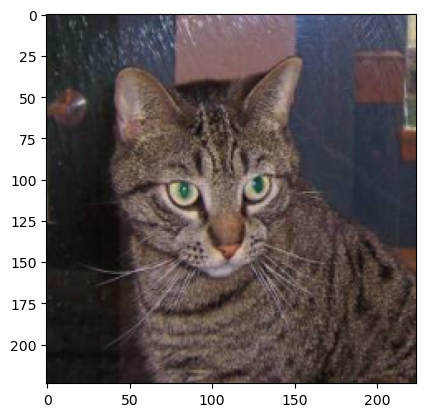

In [3]:
img = cv2.cvtColor(cv2.imread(img_load), cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
img = img/255.
img = np.expand_dims(img, 0)
plt.imshow(img[0])
plt.show()

# Define classification model

In [4]:
cls_model =  Network(cls_num = 2, is_train = False).obj_cls()

2023-04-21 03:06:23.740134: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-21 03:06:23.740253: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [5]:
print(cls_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 backbone (Sequential)       (None, 14, 14, 256)       1153728   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dropout (Dropout)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 128)               6422656   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0     

# Try to run the classification model

In [6]:
res = cls_model.predict(img)

2023-04-21 03:06:24.088849: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-21 03:06:24.155355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 238ms/step


In [7]:
print(res.shape)

(1, 2)
